In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from networkx.algorithms.bipartite.basic import color

In [29]:
df = pd.read_csv('../data/Social_Network_Ads.csv')

In [30]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [31]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [32]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [33]:
X_train.shape , X_test.shape

((360, 2), (40, 2))

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scalar to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
scaler.mean_

array([3.77000000e+01, 7.05194444e+04])

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,360.0,360.0
mean,37.7,70519.4
std,10.3,34377.7
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.2,88000.0
max,60.0,150000.0


In [39]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,360.0,360.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


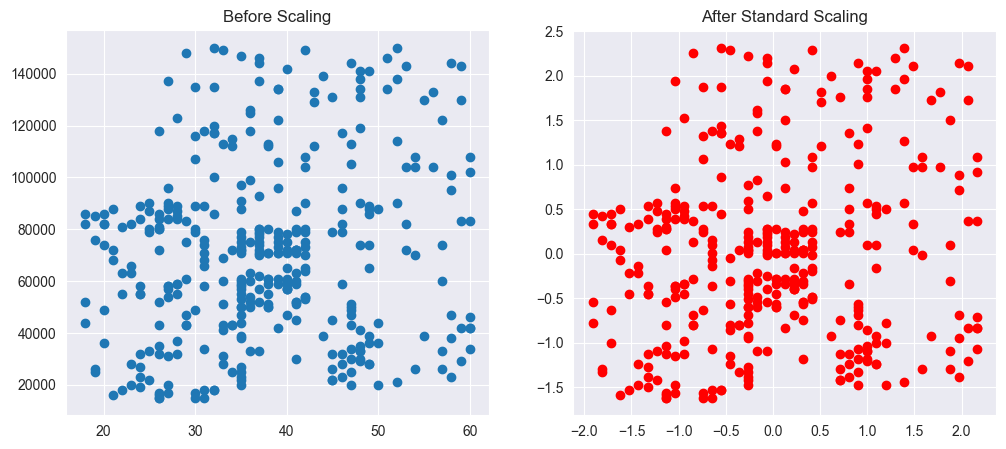

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

ax1.scatter(x = X_train['Age'], y = X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x = X_train_scaled['Age'], y = X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Standard Scaling')
plt.show()